In [80]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [81]:
si = pd.read_csv("Supplementary_information_H7N9_linelist.csv")
si = si.replace('?', np.nan)

In [82]:
si = si.drop("notes",1)

In [83]:
si.head()

,ID,age,gender,province,district,city,date_of_onset,date_of_report,date_of_provincial_confirmation,date_of_china_CDC_confirmation,date_of_notification_to_WHO,date_of_hospitalization,outcome,date_of_death,date_of_discharge,possible_source_of_exposure,number_contacts_investigated,severity
0,1,87,m,Shanghai,NaN,Shanghai,19-Feb-2013,31-Mar-2013,NaN,30-Mar-2013,31-Mar-2013,NaN,death,04-Mar-2013,NaN,NaN,NaN,critical
1,2,27,m,Shanghai,Minhang,Shanghai,27-Feb-2013,31-Mar-2013,NaN,30-Mar-2013,31-Mar-2013,03-Mar-2013,death,10-Mar-2013,NaN,pigs?,NaN,critical
2,3,35,f,Anhui,NaN,Chuzhou,09-Mar-2013,31-Mar-2013,NaN,30-Mar-2013,31-Mar-2013,19-Mar-2013,death,09-Apr-2013,NaN,poultry,NaN,critical
3,4,45,f,Jiangsu,Jiangning,Nanjing,19-Mar-2013,02-Apr-2013,30-Mar-2013,02-Apr-2013,03-Apr-2013,27-Mar-2013,NaN,NaN,NaN,poultry,49.0,critical
4,5,48,f,Jiangsu,NaN,Suquian Shuyang,19-Mar-2013,02-Apr-2013,30-Mar-2013,02-Apr-2013,03-Apr-2013,30-Mar-2013,cleared,NaN,15-May-2013,NaN,60.0,critical


In [84]:
si.ID = "case_" + si.ID.astype(str)
si.rename(columns = {"ID":"case.ID"}, inplace = True)

In [138]:
si.date_of_onset = pd.to_numeric(si.date_of_onset.fillna(np.nan))
si.date_of_onset

0      1361232000000000000
1      1361923200000000000
2      1362787200000000000
3      1363651200000000000
4      1363651200000000000
5      1363824000000000000
6      1363737600000000000
7      1362614400000000000
8      1364169600000000000
9      1364428800000000000
10     1364515200000000000
11     1364342400000000000
12     1363910400000000000
13     1364688000000000000
14     1363737600000000000
15     1363824000000000000
16     1364428800000000000
17     1364515200000000000
18     1364169600000000000
19     1364428800000000000
20     1364515200000000000
21     1364428800000000000
22     1364601600000000000
23     1364774400000000000
24     1364774400000000000
25     1364947200000000000
26     1363132800000000000
27     1364515200000000000
28     1364774400000000000
29     1365033600000000000
              ...         
106    1365897600000000000
107    1365984000000000000
108    1365984000000000000
109    1365724800000000000
110    1366156800000000000
111    1366156800000000000
1

In [96]:
si.age = pd.to_numeric(si.age)
si.age[:30]

0     87.0
1     27.0
2     35.0
3     45.0
4     48.0
5     32.0
6     83.0
7     38.0
8     67.0
9     48.0
10    64.0
11    52.0
12    67.0
13     4.0
14    61.0
15    79.0
16    74.0
17    66.0
18    59.0
19    55.0
20    67.0
21    85.0
22    25.0
23    64.0
24    62.0
25    77.0
26    51.0
27    79.0
28    76.0
29    81.0
Name: age, dtype: float64

In [105]:
si.date_of_onset.values

array(['2013-02-19T00:00:00.000000000', '2013-02-27T00:00:00.000000000',
       '2013-03-09T00:00:00.000000000', '2013-03-19T00:00:00.000000000',
       '2013-03-19T00:00:00.000000000', '2013-03-21T00:00:00.000000000',
       '2013-03-20T00:00:00.000000000', '2013-03-07T00:00:00.000000000',
       '2013-03-25T00:00:00.000000000', '2013-03-28T00:00:00.000000000',
       '2013-03-29T00:00:00.000000000', '2013-03-27T00:00:00.000000000',
       '2013-03-22T00:00:00.000000000', '2013-03-31T00:00:00.000000000',
       '2013-03-20T00:00:00.000000000', '2013-03-21T00:00:00.000000000',
       '2013-03-28T00:00:00.000000000', '2013-03-29T00:00:00.000000000',
       '2013-03-25T00:00:00.000000000', '2013-03-28T00:00:00.000000000',
       '2013-03-29T00:00:00.000000000', '2013-03-28T00:00:00.000000000',
       '2013-03-30T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2013-04-03T00:00:00.000000000',
       '2013-03-13T00:00:00.000000000', '2013-03-29

In [100]:
si.age.values

array([ 87.,  27.,  35.,  45.,  48.,  32.,  83.,  38.,  67.,  48.,  64.,
        52.,  67.,   4.,  61.,  79.,  74.,  66.,  59.,  55.,  67.,  85.,
        25.,  64.,  62.,  77.,  51.,  79.,  76.,  81.,  70.,  74.,  65.,
        74.,  83.,  68.,  31.,  56.,  66.,  74.,  54.,  53.,  86.,   7.,
        56.,  77.,  72.,  65.,  38.,  34.,  65.,  64.,  62.,  75.,  79.,
        73.,  54.,  78.,  50.,  26.,  60.,  68.,  60.,  56.,  21.,  72.,
        56.,  57.,  62.,  58.,  72.,  47.,  69.,  nan,  nan,  55.,   2.,
        89.,  37.,  74.,  86.,  41.,  38.,  26.,  80.,  54.,  69.,   4.,
        54.,  43.,  48.,  66.,  56.,  35.,  37.,  43.,  75.,  76.,  68.,
        58.,  79.,  81.,  68.,  54.,  32.,  36.,  91.,  84.,  62.,  53.,
        56.,  69.,  60.,  50.,  38.,  65.,  76.,  49.,  36.,  60.,  64.,
        38.,  54.,  80.,  31.,  80.,   4.,  58.,  69.,  69.,   9.,  79.,
         6.,  15.,  61.,  51.])

In [120]:
df = pd.DataFrame([si.age,si.number_contacts_investigated])

In [127]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
age,87.0,27.0,35.0,45.0,48.0,32.0,83.0,38.0,67.0,48.0,...,4.0,58.0,69.0,69.0,9.0,79.0,6.0,15.0,61.0,51.0
number_contacts_investigated,NaN,NaN,NaN,49.0,60.0,43.0,15.0,125.0,58.0,8.0,...,NaN,NaN,50.0,9.0,NaN,11.0,50.0,NaN,9.0,36.0


In [126]:
df.plot.scatter(x = df.age, y = df.number_contacts_investigated)

AttributeError: 'DataFrame' object has no attribute 'age'

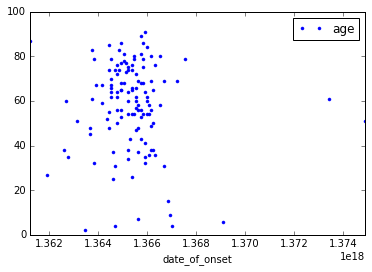

In [139]:
si.plot(x = 'date_of_onset',y = 'age',style = '.')

In [144]:
si[si.age < 30]

,case.ID,age,gender,province,district,city,date_of_onset,date_of_report,date_of_provincial_confirmation,date_of_china_CDC_confirmation,date_of_notification_to_WHO,date_of_hospitalization,outcome,date_of_death,date_of_discharge,possible_source_of_exposure,number_contacts_investigated,severity
1,case_2,27.0,m,Shanghai,Minhang,Shanghai,1361923200000000000,31-Mar-2013,NaN,30-Mar-2013,31-Mar-2013,03-Mar-2013,death,10-Mar-2013,NaN,pigs?,NaN,critical
13,case_14,4.0,m,Shanghai,NaN,NaN,1364688000000000000,04-Apr-2013,NaN,NaN,05-Apr-2013,NaN,cleared,NaN,10-Apr-2013,NaN,NaN,mild
22,case_23,25.0,f,Jiangsu,Runzhou,Zhenjiang,1364601600000000000,08-Apr-2013,08-Apr-2013,NaN,09-Apr-2013,30-Mar-2013,cleared,NaN,15-May-2013,poultry,18.0,critical
43,case_44,7.0,f,Beijing,Shunyi,NaN,1365638400000000000,NaN,13-Apr-2013,13-Apr-2013,13-Apr-2013,11-Apr-2013,cleared,NaN,17-Apr-2013,poultry-chicken,24.0,stable
59,case_60,26.0,m,Jiangsu,NaN,Yancheng,1365379200000000000,NaN,14-Apr-2013,NaN,15-Apr-2013,NaN,cleared,NaN,26-Apr-2013,NaN,21.0,NaN
64,case_65,21.0,f,Jiangsu,NaN,Kunshan,-9223372036854775808,NaN,16-Apr-2013,NaN,NaN,NaN,cleared,NaN,16-May-2013,NaN,12.0,critical
76,case_77,2.0,m,Shanghai,Putuo,NaN,1363478400000000000,NaN,NaN,NaN,NaN,NaN,cleared,NaN,NaN,NaN,NaN,NaN
83,case_84,26.0,f,Jiangsu,Xuanwu,Nanjing,-9223372036854775808,NaN,18-Apr-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
87,case_88,4.0,m,Beijing,NaN,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,poultry or ID 44,NaN,no symptoms
126,case_127,4.0,m,Shandong,NaN,Zaozhuang,1367020800000000000,NaN,28-Apr-2013,NaN,29-Apr-2013,NaN,cleared,NaN,06-May-2013,NaN,NaN,stable
